<a href="https://colab.research.google.com/github/hoangson10/code/blob/main/nhan_dien_khuon_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train_image = '/content/drive/MyDrive/codeAI/nhan_dien_khuon_mat/data/train'
valid_image = '/content/drive/MyDrive/codeAI/nhan_dien_khuon_mat/data/valid'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
train_set = train_datagen.flow_from_directory(train_image,target_size=(200,200),class_mode='categorical')
validation_set = validation_datagen.flow_from_directory(valid_image,target_size=(200,200),class_mode='categorical')

Found 80 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [ ]:
x_train,y_train=next(train_set)

In [ ]:
x_train.shape

(32, 200, 200, 3)

In [ ]:
y_train.shape

(32, 3)

In [ ]:
label = ['du','hieu','son']

In [ ]:
from keras.models import Sequential, Model 
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from keras import models
from keras.layers import Conv2D, MaxPooling2D
mod = models.Sequential()
mod.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3),padding='same'))

In [ ]:
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))

mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))

mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Flatten())
mod.add(Dense(128,activation='relu'))
mod.add(Dense(3,activation='softmax'))

In [ ]:
mod.compile(optimizer='Adam',loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history=mod.fit(train_set,epochs=100,batch_size=128,verbose=1, validation_data=validation_set, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
3/3 [==============================] - 57s 23s/step - loss: 1.4152 - accuracy: 0.5875 - val_loss: 1.0136 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 24s 8s/step - loss: 0.5924 - accuracy: 0.7750 - val_loss: 0.2709 - val_accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 24s 8s/step - loss: 0.1731 - accuracy: 1.0000 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 24s 8s/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 25s 8s/step - loss: 4.5249e-04 - accuracy: 1.0000 - val_loss: 1.5055e-05 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 24s 7s/step - loss: 2.0998e-05 - accuracy: 1.0000 - val_loss: 1.3759e-05 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 25s 10s/step - loss: 1.5890e-05 - accuracy: 1.0000 - val_loss: 2.4240e-05 - val_accuracy: 1.0000
E

In [ ]:
mod.save('nhan_dien_khuon_mat.h5')

In [ ]:
metric = mod.evaluate(x_train,y_train,verbose=2)
print('sai so',metric[0])
print('do chinh xac',metric[1])

1/1 - 1s - loss: 0.0000e+00 - accuracy: 1.0000 - 801ms/epoch - 801ms/step
sai so 0.0
do chinh xac 1.0


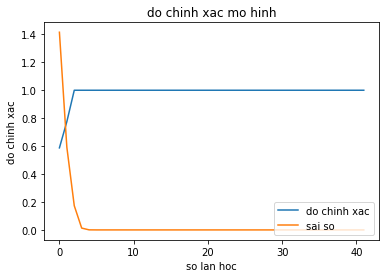

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('do chinh xac mo hinh')
plt.ylabel('do chinh xac')
plt.xlabel('so lan hoc')
plt.legend(['do chinh xac','sai so'],loc='lower right')

1/1 [==============================] - 0s 119ms/step
[[1.00000e+00 0.00000e+00 2.03805e-24]]
1/1 [==============================] - 0s 46ms/step
Đây là: du


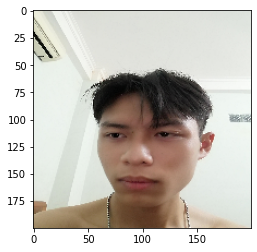

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import numpy as np
from keras.models import load_model
img=load_img('/content/drive/MyDrive/codeAI/nhan_dien_khuon_mat/data/test/IMG_20221114_191810.jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(mod.predict(img))
a= int(np.argmax(mod.predict(img),axis=1))
print("Đây là:", label[a])

1/1 [==============================] - 0s 47ms/step
[[1.2486472e-12 0.0000000e+00 1.0000000e+00]]
1/1 [==============================] - 0s 55ms/step
Đây là: son


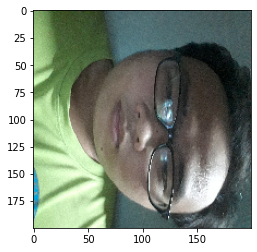

In [ ]:
img=load_img('/content/drive/MyDrive/codeAI/nhan_dien_khuon_mat/data/test/20221031_222859.jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(mod.predict(img))
a= int(np.argmax(mod.predict(img),axis=1))
print("Đây là:", label[a])

1/1 [==============================] - 0s 50ms/step
[[1.000000e+00 0.000000e+00 9.487909e-24]]
1/1 [==============================] - 0s 45ms/step
Đây là: du


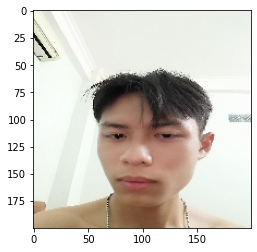

In [ ]:
img=load_img('/content/drive/MyDrive/codeAI/nhan_dien_khuon_mat/data/test/IMG_20221114_191808.jpg',target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(mod.predict(img))
a= int(np.argmax(mod.predict(img),axis=1))
print("Đây là:", label[a])